# 白州地域の交通情報


## Google directions APIで中央道ICとべるがの所要時間を計測


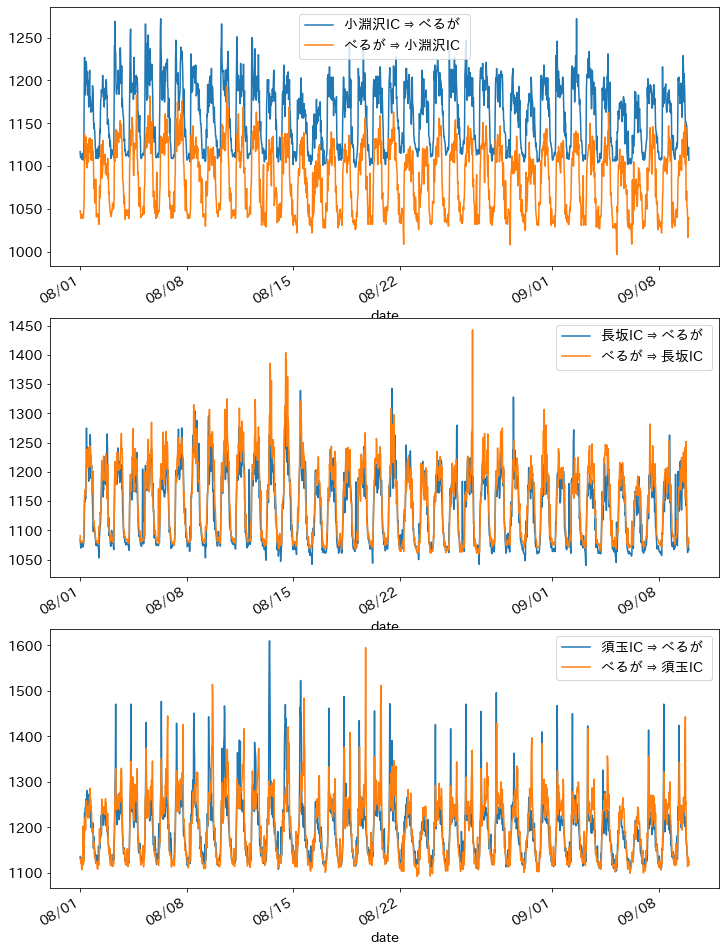

In [1]:
# 8tops上で採取しているデータの閲覧
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter  # 時間軸のフォーマットを自在に

plt.rcParams["font.size"] = 14

fig, ax = plt.subplots(figsize=(12, 18), ncols=1, nrows=3)

df = {}
# 小淵沢IC
df['小淵沢IC'] = pd.read_csv(
    "/ssd/toyoki/googleData/hakushu/kobuchizawa_googleTraffic.csv",
    sep=",",
    skipinitialspace=True)
df['小淵沢IC']['date'] = pd.to_datetime(
    df['小淵沢IC']['date'], format='%Y/%m/%d %H:%M:%S')
# 長坂IC
df['長坂IC'] = pd.read_csv(
    "/ssd/toyoki/googleData/hakushu/nagasaka_googleTraffic.csv",
    sep=",",
    skipinitialspace=True)
df['長坂IC']['date'] = pd.to_datetime(
    df['長坂IC']['date'], format='%Y/%m/%d %H:%M:%S')
# 須玉IC
df['須玉IC'] = pd.read_csv(
    "/ssd/toyoki/googleData/hakushu/sudama_googleTraffic.csv",
    sep=",",
    skipinitialspace=True)
df['須玉IC']['date'] = pd.to_datetime(
    df['須玉IC']['date'], format='%Y/%m/%d %H:%M:%S')

fig_no = 0
for p in df:
    df4plot = df[p]
    # 描画期間の限定（全部だと多すぎる時は限定）
    df4plot = df[p][(dt.strptime("2020-08-01", "%Y-%m-%d") < df[p]['date'])
                 & (df[p]['date'] < dt.strptime("2020-09-10", "%Y-%m-%d"))]
    df4plot.plot(
        x='date',
        y=['to_verga', 'from_verga'],
        ax=ax[fig_no],
        label=[p + ' ⇒ べるが ', 'べるが ⇒ ' + p])
    ax[fig_no].xaxis.set_major_formatter(DateFormatter('%m/%d'))
    fig_no += 1

## 所要時間の時間変化 (日にちについての平均)

データのある日にちを折りたたんで、1日の変化を調べる

In [2]:
# これまでに得られた日にちについて時刻ごとに平均した値
# 平日、休日を分ける　(週末はweekday=5,6） => df4av_weekday, df4av_weekend
#  => mean_df_weekday, mean_df_weekend

from_date = "2020-08-01"
to_date = "2020-09-10"

df4av = {}
mean_df = {}
df4av_weekday = {}
mean_df_weekday = {}
df4av_weekend = {}
mean_df_weekend = {}

for p in df: # pは地点
    df[p]['date_obj'] = pd.to_datetime(
        df[p]['date'])  # dateは文字列なので、datetime型の列を新設
    df[p]['hour_min'] = df[p]['date_obj'].dt.strftime("%H:%M")  # 時分の文字列の列を新設
    df[p]['day-of-week'] = df[p]['date_obj'].dt.dayofweek
    # 描画期間の限定（全部だと多すぎるので）
    df4av[p] = df[p][(dt.strptime(from_date, "%Y-%m-%d") <= df[p]['date']) &
                     (df[p]['date'] <= dt.strptime(to_date, "%Y-%m-%d"))]
    df4av_weekend[p] = df[p][(dt.strptime(from_date, "%Y-%m-%d") <= df[p]['date']) &
                             (df[p]['date'] <= dt.strptime(to_date, "%Y-%m-%d")) &
                             (df[p]['date_obj'].dt.dayofweek >= 5)]
    df4av_weekday[p] = df[p][(dt.strptime(from_date, "%Y-%m-%d") <= df[p]['date']) &
                             (df[p]['date'] <= dt.strptime(to_date, "%Y-%m-%d")) &
                             (df[p]['date_obj'].dt.dayofweek < 5)]
    
    #if df[p]['date_obj'].dt.dayofweek >= 5:
    #print(df4av[p].tail())
    # groupbyによる平均値計算mean()を行うとマルチインデックスのデータ構造になる
    # reset_index()によりマルチインデックスが解除になる
    mean_df[p] = df4av[p].groupby('hour_min').mean().reset_index()
    mean_df_weekday[p] = df4av_weekday[p].groupby('hour_min').mean().reset_index()
    mean_df_weekend[p] = df4av_weekend[p].groupby('hour_min').mean().reset_index()    

/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


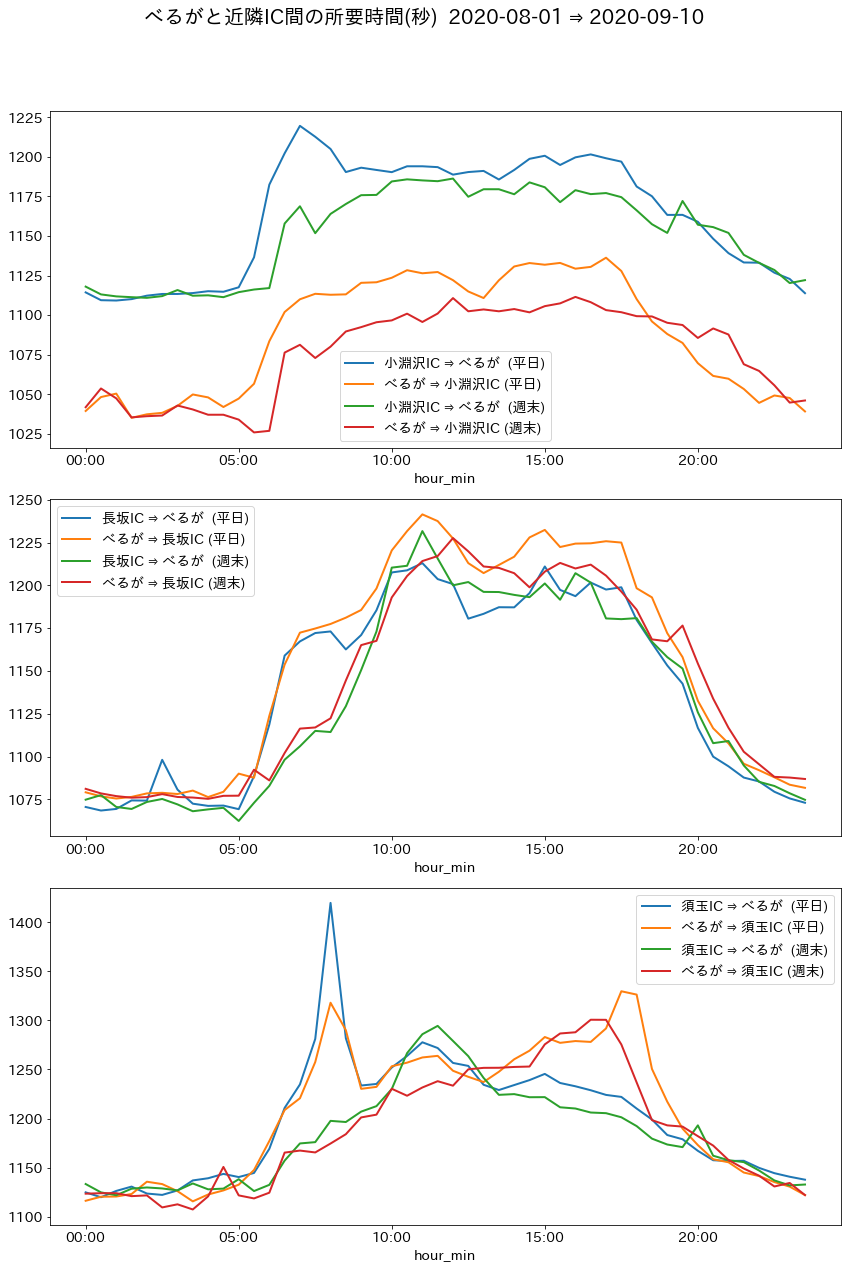

In [3]:
# 取得期間を平均した日変位データmean_dfをプロット

# 期間を限定したいときは次を使う
# df[p] = df[p][(dt.strptime("2020-01-05","%Y-%m-%d") < df[p]['date']) &
#        (df[p]['date'] < dt.strptime("2020-01-31","%Y-%m-%d"))]

plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(figsize=(12, 18), ncols=1, nrows=3)

fig_no = 0
for p in mean_df:
    '''
    mean_df[p].plot(
        x='hour_min',
        y=['to_verga', 'from_verga'],
        label=[p + ' ⇒ べるが ', 'べるが ⇒ ' + p],
        ax=ax[fig_no],
        fontsize=14,
        lw=2)
    '''
    mean_df_weekday[p].plot(
        x='hour_min',
        y=['to_verga', 'from_verga'],
        label=[p + ' ⇒ べるが ' + " (平日)", 'べるが ⇒ ' + p + " (平日)"],
        ax=ax[fig_no],
        fontsize=14,
        lw=2)
    mean_df_weekend[p].plot(
        x='hour_min',
        y=['to_verga', 'from_verga'],
        label=[p + ' ⇒ べるが ' + " (週末)", 'べるが ⇒ ' + p + " (週末)"],
        ax=ax[fig_no],
        fontsize=14,
        lw=2)
    fig_no += 1

plt.tight_layout()
fig.suptitle("べるがと近隣IC間の所要時間(秒)  " + from_date + " ⇒ " + to_date, fontsize=20)
plt.subplots_adjust(top=0.9)

#file_body = "JotoGoogleDirectionData"
#plt.savefig(file_body + ".svg", bbox_inches="tight")
#import subprocess
#subprocess.run("inkscape --file " + file_body + ".svg" + " --export-emf " + file_body + ".emf", shell=True)